In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
airline = pd.read_excel("D:\\Assignment\\18. Assignment18_Forecasting\\Airlines+Data.xlsx")

In [3]:
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airline.shape

(96, 2)

In [5]:
airline.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
airline.duplicated().sum()

0

In [8]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
airline.Passengers.quantile(0.1)

127.5

In [11]:
airline.Passengers.quantile(0.40)

183.0

In [12]:
airline.Passengers.quantile(0.70)

242.0

In [13]:
airline.Passengers.quantile(0.90)

312.5

# Visualization

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

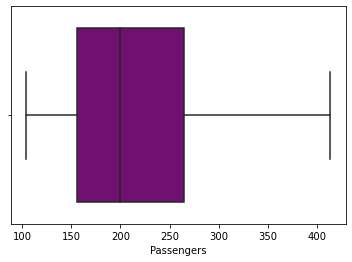

In [14]:
# Box Plot
sns.boxplot(airline.Passengers ,color = 'purple')


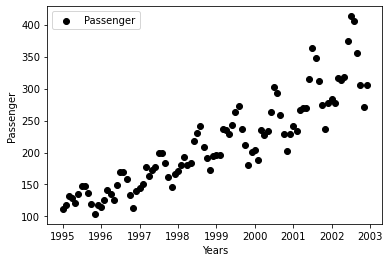

In [15]:
plt.scatter(x=airline.Month ,y=airline.Passengers ,label ="Passenger" ,color = "k")
plt.xlabel('Years')
plt.ylabel('Passenger')
plt.legend()
plt.show()

Text(0.5, 1.0, 'lineplot')

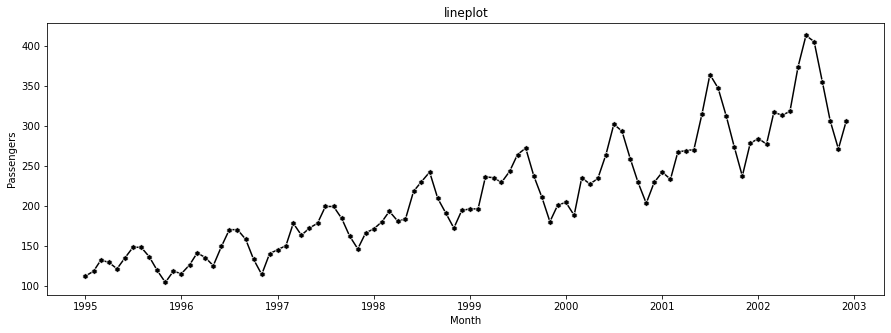

In [16]:
# Lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(x="Month" ,y="Passengers" ,data=airline ,marker ='h' ,color ='k')
plt.title("lineplot")

<AxesSubplot:xlabel='Passengers', ylabel='Count'>

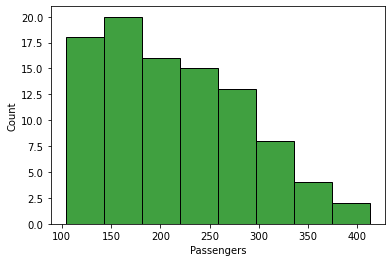

In [17]:
sns.histplot(airline.Passengers ,color ='green')

In [18]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

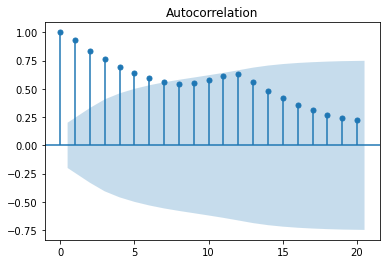

In [19]:
airline1 = pd.read_excel("D:\\Assignment\\18. Assignment18_Forecasting\\Airlines+Data.xlsx" ,header= 0 ,index_col=0,parse_dates=True)  # parse_dates is used for cansider as an date-time format only not as an index
plot_acf(airline1, lags=20)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

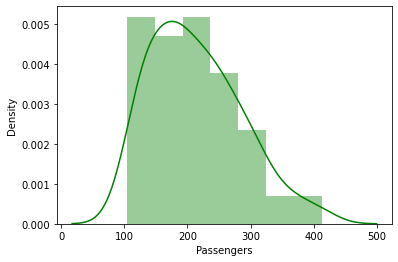

In [20]:
sns.distplot(airline.Passengers ,color ='green')

In [21]:
# Transformations

In [22]:
airline["Passengers_sqr"] = np.sqrt(airline.Passengers)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers_sqr', ylabel='Density'>

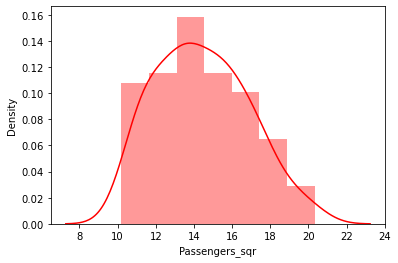

In [23]:
sns.distplot(airline.Passengers_sqr ,color ='red')

In [24]:
airline["Passengers_log"] = np.log(airline.Passengers)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers_log', ylabel='Density'>

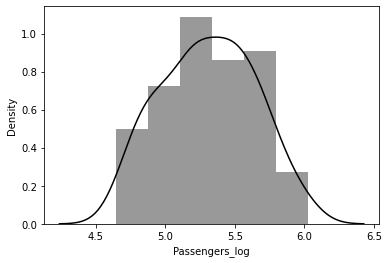

In [25]:
sns.distplot(airline.Passengers_log ,color ='k')

In [26]:
airline.head()

,Month,Passengers,Passengers_sqr,Passengers_log
0,1995-01-01,112,10.583005,4.718499
1,1995-02-01,118,10.862780,4.770685
2,1995-03-01,132,11.489125,4.882802
3,1995-04-01,129,11.357817,4.859812
4,1995-05-01,121,11.000000,4.795791


In [27]:
airline1 = airline.drop('Passengers_sqr' ,axis=1)

In [28]:
airline1.head()

,Month,Passengers,Passengers_log
0,1995-01-01,112,4.718499
1,1995-02-01,118,4.770685
2,1995-03-01,132,4.882802
3,1995-04-01,129,4.859812
4,1995-05-01,121,4.795791


In [29]:
# Convert into datetime format
airline1["Date"] = pd.to_datetime(airline1.Month , format="%b-%y")

#%b = Month  , %y =year

In [30]:
airline1.head()

,Month,Passengers,Passengers_log,Date
0,1995-01-01,112,4.718499,1995-01-01
1,1995-02-01,118,4.770685,1995-02-01
2,1995-03-01,132,4.882802,1995-03-01
3,1995-04-01,129,4.859812,1995-04-01
4,1995-05-01,121,4.795791,1995-05-01


In [31]:
# Extract month from column
airline1["months"] = airline1.Month.dt.strftime('%b')
airline1.head()

,Month,Passengers,Passengers_log,Date,months
0,1995-01-01,112,4.718499,1995-01-01,Jan
1,1995-02-01,118,4.770685,1995-02-01,Feb
2,1995-03-01,132,4.882802,1995-03-01,Mar
3,1995-04-01,129,4.859812,1995-04-01,Apr
4,1995-05-01,121,4.795791,1995-05-01,May


In [32]:
dummies = pd.DataFrame(pd.get_dummies(airline1['months']))

In [33]:
dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
# Concatinating
airline2 = pd.concat([airline1,dummies] ,axis =1)
airline2.head()

,Month,Passengers,Passengers_log,Date,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,4.718499,1995-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,4.770685,1995-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,4.882802,1995-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4.859812,1995-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,4.795791,1995-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
airline2.shape

(96, 17)

<AxesSubplot:xlabel='months', ylabel='Passengers'>

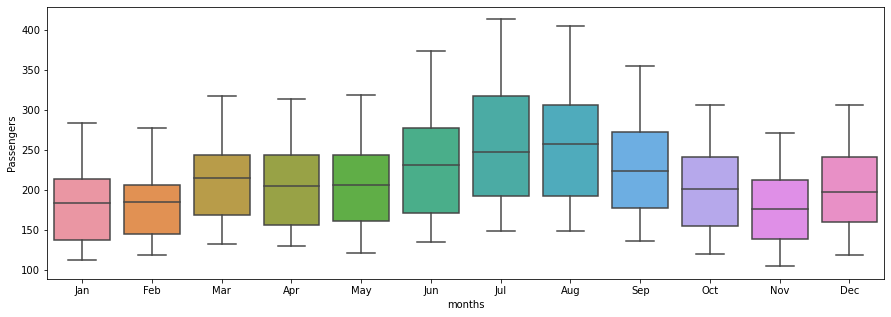

In [36]:
# Boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='months',y='Passengers' ,data =airline2)

In [37]:
airline2['t'] = np.arange(1,97)
airline2["t_sqr"] = airline2['t']*airline2['t']
airline2.head()

,Month,Passengers,Passengers_log,Date,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sqr
0,1995-01-01,112,4.718499,1995-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,1995-02-01,118,4.770685,1995-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,1995-03-01,132,4.882802,1995-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,1995-04-01,129,4.859812,1995-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,1995-05-01,121,4.795791,1995-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25


In [38]:
airline2.tail()

,Month,Passengers,Passengers_log,Date,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sqr
91,2002-08-01,405,6.003887,2002-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464
92,2002-09-01,355,5.872118,2002-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649
93,2002-10-01,306,5.723585,2002-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836
94,2002-11-01,271,5.602119,2002-11-01,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025
95,2002-12-01,306,5.723585,2002-12-01,Dec,0,0,1,0,0,0,0,0,0,0,0,0,96,9216


# Split Data

In [39]:
train = airline2.head(70)
test = airline2.tail(27)

In [40]:
import statsmodels.formula.api as smf

In [41]:
# Linear model
linear_model = smf.ols('Passengers~t' ,data=train).fit()
pred_linr = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))

In [42]:
pred_linr

69    253.511066
70    255.585093
71    257.659120
72    259.733147
73    261.807173
74    263.881200
75    265.955227
76    268.029254
77    270.103281
78    272.177307
79    274.251334
80    276.325361
81    278.399388
82    280.473414
83    282.547441
84    284.621468
85    286.695495
86    288.769521
87    290.843548
88    292.917575
89    294.991602
90    297.065629
91    299.139655
92    301.213682
93    303.287709
94    305.361736
95    307.435762
dtype: float64

In [43]:
#RMSE
rmse_linear = np.sqrt(np.mean(( np.array(test['Passengers']) - np.array(pred_linr))**2))
print('RMSE_linear:' +str(rmse_linear))

RMSE_linear:47.64089779873409


In [44]:
# Exponential
exp = smf.ols('Passengers_log~t' ,data=train) .fit()
exp_pred = pd.Series(exp.predict(pd.DataFrame(test['t'])))

In [45]:
exp_rmse = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(exp_pred )))**2))
print('RMSE_Exponential:' +str(exp_rmse))

RMSE_Exponential:43.14063028330689


In [46]:
# Quadratic
quad = smf.ols('Passengers~t+t_sqr' ,data = train ).fit()
quad_pred =pd.Series(quad.predict(test[["t" ,"t_sqr"]]))

In [47]:
quad_rmse = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(quad_pred))**2))
print('RMSE_Quadratic:' +str(quad_rmse))

RMSE_Quadratic:43.45247848611854


In [48]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE_Additive_seasonality: "+ str(rmse_add_sea))

RMSE_Additive_seasonality: 123.09267160342712


In [49]:
# Additive seasonality Quadratic
add_sea_qdr = smf.ols('Passengers~t+t_sqr+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec' ,data=train).fit()
add_sea_qdr_pred = add_sea_qdr.predict(test[['t','t_sqr','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])

In [50]:
add_sea_qdr_rmse = np.sqrt(np.mean((np.array(test['Passengers']) -np.array(add_sea_qdr_pred))**2))
print('RMSE_Additive_seasonality_Quadratic:' +str(add_sea_qdr_rmse))

RMSE_Additive_seasonality_Quadratic:29.866469844932443


In [51]:
#  Multiplicative Seasonality
Mul_sea = smf.ols('Passengers_log~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE_Multiplicative_Seasonality:" + str(rmse_Mult_sea))

RMSE_Multiplicative_Seasonality:127.72137298365344


In [52]:
#  Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Passengers_log~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE_Multiplicative_Additive_Seasonality:",rmse_Mult_add_sea )

RMSE_Multiplicative_Additive_Seasonality: 11.641183374135089


In [53]:
# DataFrame
data = {"Model":pd.Series(["RMSE_linear","RMSE_Exponential","RMSE_Quadratic","RMSE_Additive_seasonality","RMSE_Additive_seasonality_Quadratic","RMSE_Multiplicative_Seasonality","RMSE_Multiplicative_Additive_Seasonality"]),
       "RMSE_values" :pd.Series([rmse_linear ,exp_rmse,quad_rmse,rmse_add_sea,add_sea_qdr_rmse,rmse_Mult_sea,rmse_Mult_add_sea])}

In [54]:
data1 = pd.DataFrame(data)
data1.sort_values(['RMSE_values'])

,Model,RMSE_values
6,RMSE_Multiplicative_Additive_Seasonality,11.641183
4,RMSE_Additive_seasonality_Quadratic,29.866470
1,RMSE_Exponential,43.140630
2,RMSE_Quadratic,43.452478
0,RMSE_linear,47.640898
3,RMSE_Additive_seasonality,123.092672
5,RMSE_Multiplicative_Seasonality,127.721373


In [55]:
# RMSE values is less for Multiplicative_Additive_Seasonality..so we'll select it as a final model.

In [56]:
#

In [57]:
predict_data = [['2003-01-01' , 'Jan'] ,['2003-02-01' ,'Feb'],['2003-03-01' ,'Mar'] ,['2003-04-01','Apr'],['2003-05-01','May'],
               ['2003-06-01','Jun'],['2003-07-01' ,'Jul'],['2003-08-01','Aug'],['2003-09-01','Sep'],['2003-10-01','Oct'],
                ['2003-11-01','Nov'],['2003-12-01','Dec']]

In [58]:
forecast = pd.DataFrame(predict_data ,columns=['Date' ,'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-05-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [59]:
dummies1 = pd.get_dummies(forecast['Months'])
dummies1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
forecast1 = pd.concat([forecast,dummies1] ,axis =1)

In [61]:
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0


In [62]:
forecast1['t'] = np.arange(97 ,109)
forecast1['t_sqr'] = forecast1['t']*forecast1['t']

In [63]:
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sqr
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,97,9409
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,98,9604
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,99,9801
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,100,10000
4,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,101,10201
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,102,10404
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,103,10609
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,104,10816
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,105,11025
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,106,11236


# Predict for new time period

In [64]:
# Final Model
Mul_Add_sea1 = smf.ols('Passengers_log~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = airline2).fit()

In [65]:
pred_Mult_add_sea = pd.Series(Mul_Add_sea1.predict(forecast1))

In [66]:
pred_Mult_add_sea 

0     5.770755
1     5.781280
2     5.924459
3     5.891606
4     5.885083
5     6.008926
6     6.115180
7     6.113063
8     6.002824
9     5.872713
10    5.742262
11    5.878809
dtype: float64

In [67]:
forecast1['Forecasted_passenger_log'] = pd.Series(pred_Mult_add_sea)
forecast1['Forecasted_passenger'] = np.exp(forecast1.Forecasted_passenger_log)

In [68]:
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sqr,Forecasted_passenger_log,Forecasted_passenger
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,97,9409,5.770755,320.779889
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,98,9604,5.781280,324.173779
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,99,9801,5.924459,374.075905
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,100,10000,5.891606,361.986306
4,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,101,10201,5.885083,359.632793
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,102,10404,6.008926,407.045777
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,103,10609,6.115180,452.677464
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,104,10816,6.113063,451.720349
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,105,11025,6.002824,404.569872
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,106,11236,5.872713,355.211286


In [69]:
# Forecasting of passengers for next 12 months
forecast1.loc[:,['Date','Forecasted_passenger']]

,Date,Forecasted_passenger
0,2003-01-01,320.779889
1,2003-02-01,324.173779
2,2003-03-01,374.075905
3,2003-04-01,361.986306
4,2003-05-01,359.632793
5,2003-06-01,407.045777
6,2003-07-01,452.677464
7,2003-08-01,451.720349
8,2003-09-01,404.569872
9,2003-10-01,355.211286


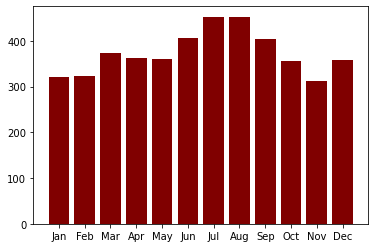

In [70]:
plt.bar(forecast1['Months'],forecast1['Forecasted_passenger'] ,width=0.8 ,color ='maroon')
plt.show()

Text(0.5, 1.0, 'lineplot')

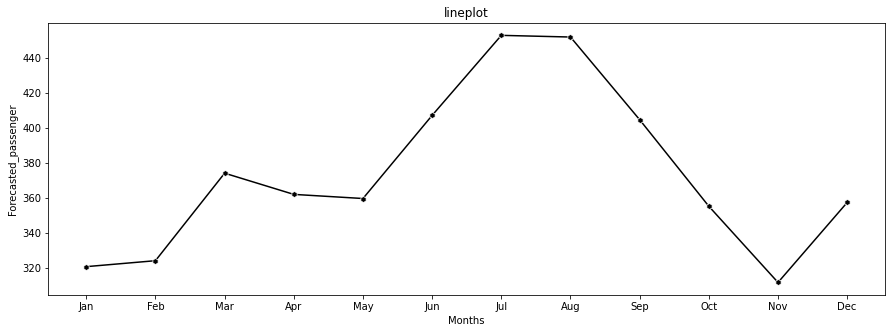

In [71]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="Months" ,y="Forecasted_passenger" ,data=forecast1,marker ='h' ,color ='k')
plt.title("lineplot")